In [2]:
# common imports
from arcgis.gis import GIS, Item

In [3]:
# source gis
gis = GIS(username="mpayson_startups")

Enter password:  ········


# Share via group

<Item title:"Shared EPC 2020 Demo Inspections" type:Feature Layer Collection owner:mpayson_startups>
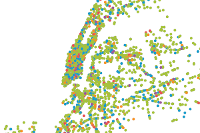

In [4]:
# create an empty item from before
t_item = Item(gis, '3be0f091142e4fe49a7d8d2aad3dd8b0')

res = gis.content.clone_items([t_item], folder='@epcdemos', copy_data=False, search_existing_items=False)
empty_lyr_item = res[0]
empty_lyr_item.update({
    'title': 'Shared EPC 2020 Demo Inspections'
})

empty_lyr_item

In [5]:
# create a group
group_schema = {
    "title": "EPC 2020 Demo Group",
    "tags": "test, group, poc, epc",
    "description": "A group to showcase sharing data",
    "access": 'private',
    "is_invitation_only": True,
    "users_update_items": False
}
group = gis.groups.create_from_dict(group_schema)

# add users via their ArcGIS Online user name
# users will receive a notification to accept the invite
usernames=['mspatialstartups']
group.invite_users(usernames)

# share the outputs to the group
gis.content.share_items([empty_lyr_item], groups=[group])

{'results': [{'itemId': '6f45ad4aed44444f8d370391c7e7cab0',
   'success': True,
   'notSharedWith': []}]}

# Publish service directly

<Item title:"NYC_Restaurant_Inspections" type:Feature Layer Collection owner:mspatialstartups>
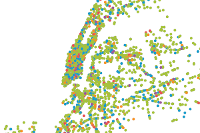

In [7]:
# target gis
target_gis = GIS(
    token="Qq01PpbQeAHQh-ktHfguw84jQdbqecL2GiN95RVJA6sKHVaudcJ0yvsTiDKhR5G9mPDUHsUrLq8k1PYeIzsD_TpX1gqYqugB37y3hEWcYwrVHhjtbfb0hT03HfNLEsifnY02kde00kNges-W75PtnR5aMki6TWxpAdi1oJRYVvhwRNyCzqaPTEhCA7zyO9-Ue5y_vKdk68r7q5KMg4Ztbw4Pnkl5anlsdXdtJC5QSBY."
)

# publish the results directly to that GIS
res = target_gis.content.clone_items([t_item], folder='@epcdemos', copy_data=True)
empty_lyr_item = res[0]
empty_lyr_item